Title: Predicting income above 50k
Description: Perform business analysis to predict whether income exceeds $50,000 per year based on census data.
Created by - Suraj Sagar Chathiri

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

income = pd.read_csv('/content/census_income.csv')
print(income.head())
print()
print('The descriptive statistics of income:')
print(income.describe())
print(income.info())
print(income.shape)
print()
income = income[(income.astype(str) != ' ?').all(axis = 1)]
len(income)
print(income.shape)
print(income.info())

   Unnamed: 0  age          workclass   education  education_level  \
0           0   39          State-gov   Bachelors               13   
1           1   50   Self-emp-not-inc   Bachelors               13   
2           2   38            Private     HS-grad                9   
3           3   53            Private        11th                7   
4           4   28            Private   Bachelors               13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   hours_per_week  native_country  income  income_above_50k  
0              40   United-States   <=50K 

The average education level of employees based on their age:
occupation
 Adm-clerical         3721
 Armed-Forces            9
 Craft-repair         4030
 Exec-managerial      3992
 Farming-fishing       989
 Handlers-cleaners    1350
 Machine-op-inspct    1966
 Other-service        3212
 Priv-house-serv       143
 Prof-specialty       4038
 Protective-serv       644
 Sales                3584
 Tech-support          912
 Transport-moving     1572
dtype: int64



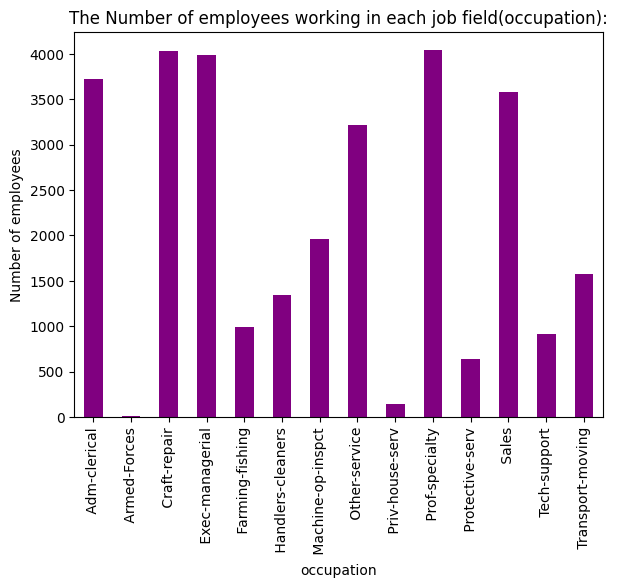

In [ ]:
print('The average education level of employees based on their age:')
ns1 = income.groupby(['occupation']).size()
print(ns1)
print()

# Creating the bar plot.
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
ns1.plot(kind='bar', color = 'purple')
plt.title('The Number of employees working in each job field(occupation):')
plt.xlabel('occupation')
plt.ylabel('Number of employees')
plt.show()
print()

The average education level of employees based on their age:
education
 10th            37.897561
 11th            32.363550
 12th            32.013263
 1st-4th         44.622517
 5th-6th         41.649306
 7th-8th         47.631957
 9th             40.303297
 Assoc-acdm      37.286706
 Assoc-voc       38.246366
 Bachelors       38.641554
 Doctorate       47.130667
 HS-grad         38.640955
 Masters         43.740012
 Preschool       41.288889
 Prof-school     44.249077
 Some-college    36.135370
Name: age, dtype: float64



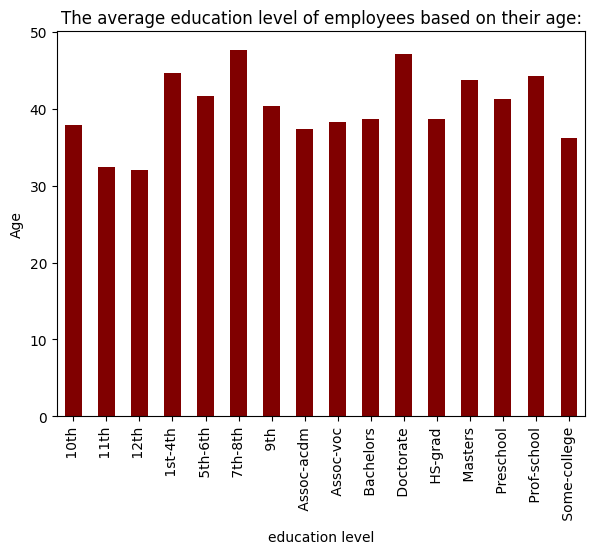

In [ ]:
print('The average education level of employees based on their age:')
ns = income.groupby(['education'])['age'].mean()
print(ns)
print()

# Creating the bar plot.
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
ns.plot(kind='bar', color = 'maroon')
plt.title('The average education level of employees based on their age:')
plt.xlabel('education level')
plt.ylabel('Age')
plt.show()
print()

The number of workers whose income below and above 50k($)
income_above_50k
0    22654
1     7508
dtype: int64



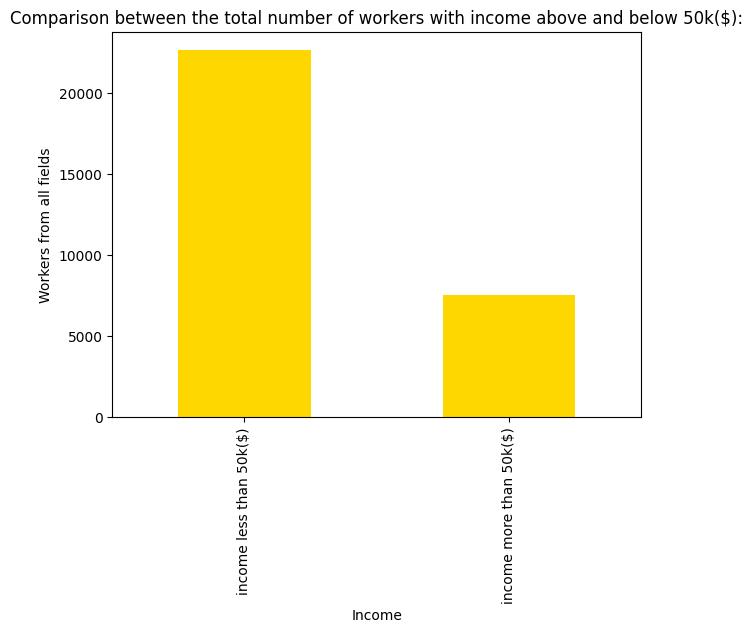

In [ ]:
print('The number of workers whose income below and above 50k($)')
ns3 = income.groupby(['income_above_50k']).size()
print(ns3)
print()

# Creating the bar plot.
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
ns3.plot(kind='bar', color = 'gold')
plt.title('Comparison between the total number of workers with income above and below 50k($):')
plt.xticks(ticks=[0, 1], labels=['income less than 50k($)', 'income more than 50k($)'])
plt.xlabel('Income')
plt.ylabel('Workers from all fields')
plt.show()
print()

Comparing average age and income with below and above 50k$:
income
0    36.60806
1    43.95911
Name: age, dtype: float64



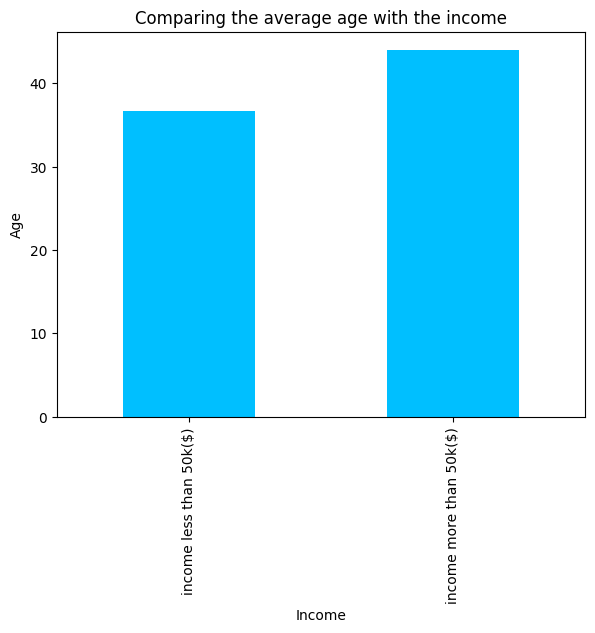

In [ ]:
print('Comparing average age and income with below and above 50k$:')
ns4 = income.groupby(['income'])['age'].mean()
print(ns4)
print()

# Creating the bar plot.
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
ns4.plot(kind='bar', color = 'deepskyblue')
plt.title('Comparing the average age with the income')
plt.xticks(ticks=[0, 1], labels=['income less than 50k($)', 'income more than 50k($)'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()
print()

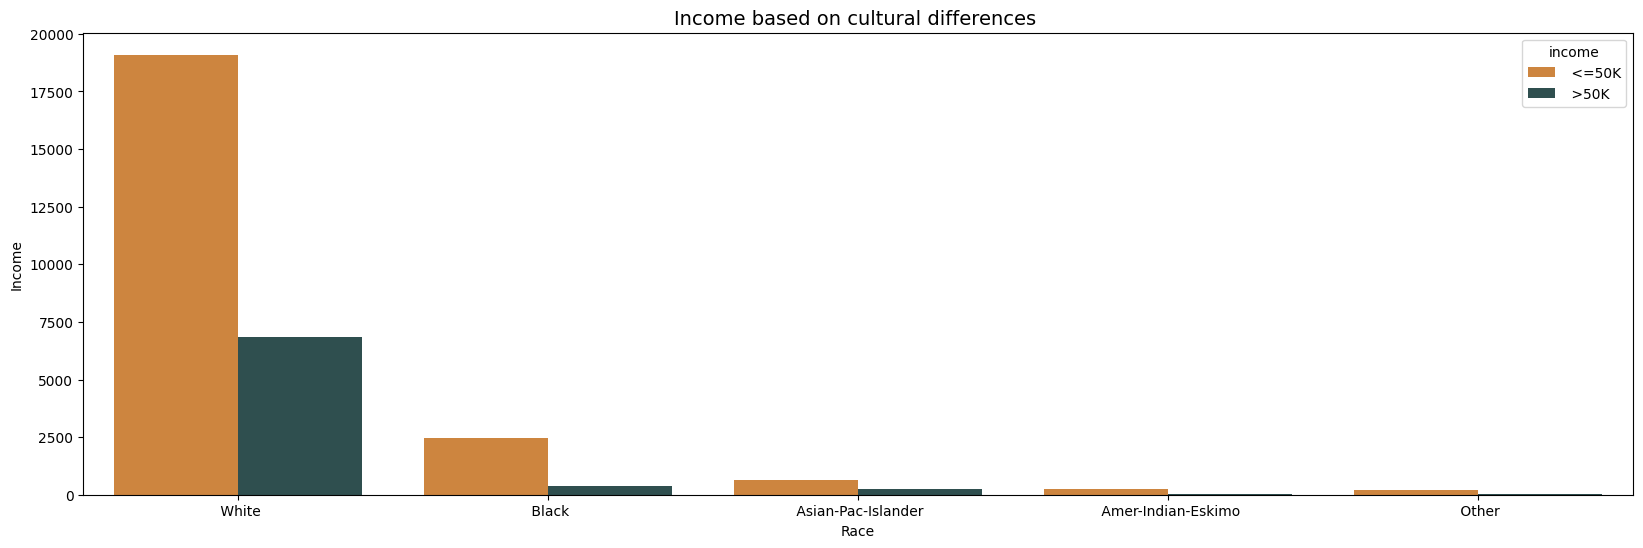

In [ ]:
# Plotting the income categorize by people based on cultural differences.
plt.figure(figsize=(20,6))
bar_colors_1 = ['peru', 'darkslategrey']
ax = sns.countplot(x = 'race', hue = 'income', data = income, palette=bar_colors_1, saturation=1)
ax.set_title('Income based on cultural differences ', fontsize = 14)
ax.set_xlabel("Race")
ax.set_ylabel("Income")
plt.show()

Text(0, 0.5, 'Proportion of Records')

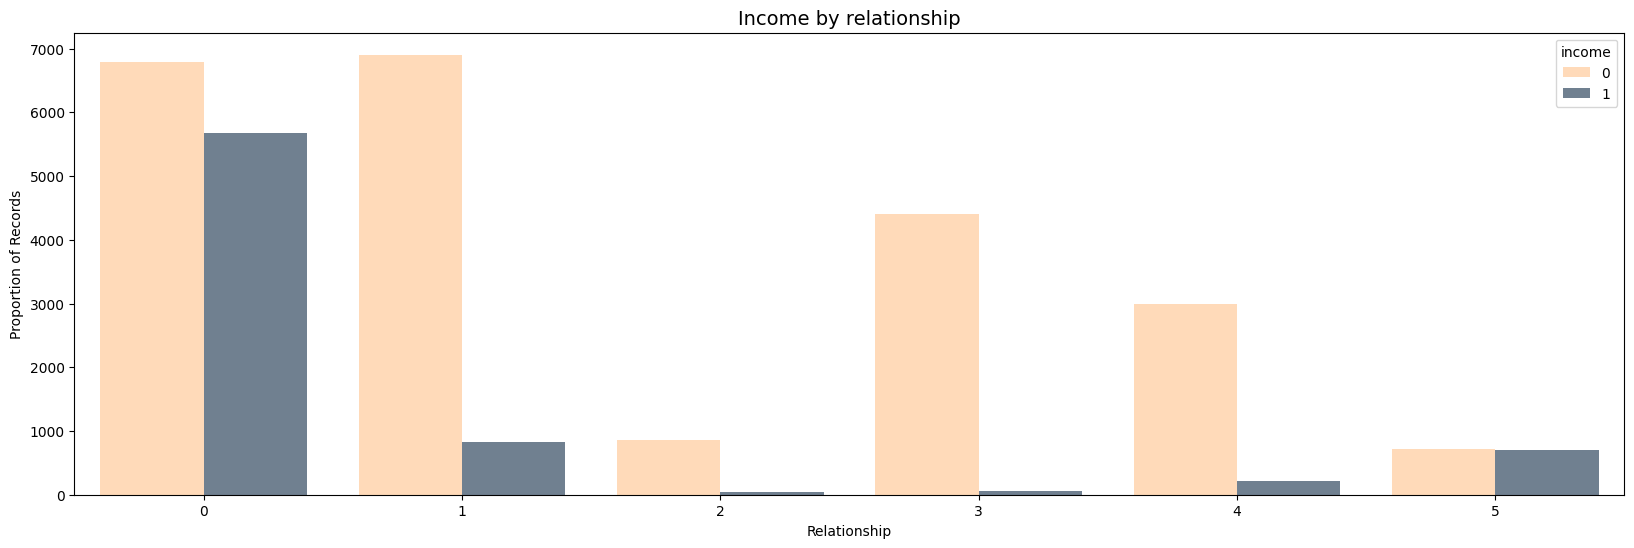

In [ ]:
# Plotting the income by relationship
plt.figure(figsize=(20,6))
bar_colors_1 = ['peachpuff', 'slategrey']
ax = sns.countplot(x = 'relationship', hue = 'income', data = income, palette=bar_colors_1, saturation=1)
ax.set_title('Income by relationship', fontsize = 14)
ax.set_xlabel("Relationship")
ax.set_ylabel("Proportion of Records")

In [ ]:
# Changing all the string or object(categorical) datatypes to integer datatypes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in income.columns:
    if income[col].dtypes == 'object':
        income[col] = le.fit_transform(income[col])

print(income.head())
print()

   Unnamed: 0  age  workclass  education  education_level  marital_status  \
0           0   39          5          9               13               4   
1           1   50          4          9               13               2   
2           2   38          2         11                9               0   
3           3   53          2          1                7               2   
4           4   28          2          9               13               2   

   occupation  relationship  race  sex  hours_per_week  native_country  \
0           0             1     4    1              40              38   
1           3             0     4    1              13              38   
2           5             1     4    1              40              38   
3           5             0     2    1              40              38   
4           9             5     2    0              40               4   

   income  income_above_50k  
0       0                 0  
1       0                 0  
2 

In [ ]:
# K nearest Neighbor
# Start by defining k ( the number of neighbors) and target values.

# k Nearest Neighbor
# Start by defining k (the  number of neighbors) and target value.
k = 15
newage = 50
neweducationlevel = 16
newhour = 40
newrace = 4
newworkclass = 5
newmaritalstatus = 2
newoccupation= 6
newsex = 1
newcountry = 38

# Set up the x and y variables
x = income[['age', 'education_level', 'hours_per_week','occupation','workclass','marital_status','sex', 'race', 'native_country']]
y = income['income_above_50k']
target_values = [[newage, neweducationlevel, newhour, newoccupation, newworkclass, newmaritalstatus, newsex, newrace, newcountry]]

from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=k)
knnclassifier.fit(x,y)

# Print the prediction of income compared with the demographic groups(either 0 or 1).
print('The prediction of income compared with the demographic groups (either 0 or 1):')
print(knnclassifier.predict(target_values))
print()

# Decision tree
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(max_depth=3)
dtclassifier.fit(x,y)
print('Decision Tree Prediction of income above 50k$:')
print(dtclassifier.predict(target_values))
print()

# Random forest
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier()
rfclassifier.fit(x,y)
print('Random Forest Prediction of income above 50k$:')
print(rfclassifier.predict(target_values))
print()

# Neural Network
from sklearn.neural_network import MLPClassifier
nnclassifier = MLPClassifier()
nnclassifier.fit(x,y)
print('Neural network Prediction of income above 50k$:')
print(nnclassifier.predict(target_values))
print()

# Create a train test dataset with 75/25 split. Use this to train data and test its accuracy.
from sklearn.model_selection import train_test_split
trainingx, testx, trainingy, testy = train_test_split(x, y, random_state = 1)

#Use each technique on the train/test data and determine which is the most accurate(smallest error).

# Nearest Neighbor
knnclassifier = KNeighborsClassifier(n_neighbors=15)
knnclassifier.fit(trainingx, trainingy)
predicted = knnclassifier.predict(testx)
predictionerror = abs(predicted - testy)
print('Nearest Neighbor prediction score:')
print(np.mean(predictionerror))
print()

# Decision Tree
dtclassifier = DecisionTreeClassifier(max_depth=3)
dtclassifier.fit(trainingx, trainingy)
predicted = dtclassifier.predict(testx)
predictionerror = abs(predicted - testy)
print('Decision tree prediction score:')
print(np.mean(predictionerror))
print()

# Random Forest
rfclassifier = RandomForestClassifier(random_state=1)
rfclassifier.fit(trainingx, trainingy)
predicted = rfclassifier.predict(testx)
predictionerror = abs(predicted - testy)
print('Random Forest prediction score:')
print(np.mean(predictionerror))
print()

# Neural Network
nnclassifier = MLPClassifier()
nnclassifier.fit(trainingx, trainingy)
predicted = nnclassifier.predict(testx)
predictionerror = abs(predicted - testy)
print('Neural network prediction score:')
print(np.mean(predictionerror))
print()

print('The End')

The prediction of income compared with the demographic groups (either 0 or 1):
[1]

Decision Tree Prediction of income above 50k$:
[1]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Random Forest Prediction of income above 50k$:
[1]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Neural network Prediction of income above 50k$:
[1]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Nearest Neighbor prediction score:
0.19679087654157273

Decision tree prediction score:
0.1796843919904522

Random Forest prediction score:
0.18048004243469035

Neural network prediction score:
0.17464527251027714

The End
